# Data 102 Spring 2023 Lecture 4: Binary Classification & ROC curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

sns.set()  # This helps make our plots look nicer

In [2]:
def make_2x2_table(reality, decisions):
    return pd.DataFrame(
        confusion_matrix(reality, decisions),
        columns = ["D=0", "D=1"],
        index = ["R=0", "R=1"]
    )

## Decisions by thresholding: binary classification

In this section, we'll work with a dataset predicting breast cancer from biopsy data.

In [3]:
dataset = load_breast_cancer()
X = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset['target']

# Randomly flip 20% of the outputs to make the problem a little harder
np.random.seed(42)
mask = np.random.random(y.shape) < 0.2
y[mask] = 1 - y[mask]

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

Divide data to train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

Let's use logistic regression to predict y from X:

In [6]:
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test)

Now, we can use our 2x2 table to evaluate the performance:

In [7]:
make_2x2_table(reality=y_test, decisions=y_hat_test)

,D=0,D=1
R=0,41,32
R=1,16,99


*Check: what is the false positive rate for these predictions? What about the false discovery rate?*

In [8]:
fpr = 32 / (32 + 41)
fpr

0.4383561643835616

In [9]:
fdr = 32 / (32 + 99)
fdr

0.24427480916030533

In [10]:
tpr = 99 / (99 + 16)
tpr

0.8608695652173913

For patients with cancer (R=1), we're correct $86\%$ of the time. What if this isn't enough? Suppose we need a higher true positive rate: what can we do?

Recall that a logistic regression model's predictions are probabilities between 0 and 1: we always threshold these to obtain binary decisions.

So, let's look at the probabilities directly:

In [11]:
predicted_probs = model.predict_proba(X_test)[:, 1]
predicted_probs.round(2)

array([0.59, 0.34, 0.45, 0.81, 0.82, 0.14, 0.18, 0.42, 0.43, 0.75, 0.7 ,
       0.46, 0.71, 0.52, 0.71, 0.44, 0.73, 0.88, 0.79, 0.2 , 0.63, 0.75,
       0.14, 0.78, 0.77, 0.75, 0.76, 0.81, 0.73, 0.28, 0.74, 0.77, 0.64,
       0.7 , 0.78, 0.72, 0.53, 0.65, 0.42, 0.64, 0.78, 0.44, 0.71, 0.73,
       0.8 , 0.65, 0.71, 0.78, 0.65, 0.74, 0.39, 0.33, 0.66, 0.78, 0.67,
       0.69, 0.76, 0.05, 0.66, 0.76, 0.69, 0.2 , 0.11, 0.68, 0.77, 0.6 ,
       0.29, 0.11, 0.81, 0.69, 0.45, 0.43, 0.78, 0.52, 0.7 , 0.7 , 0.71,
       0.59, 0.8 , 0.67, 0.49, 0.76, 0.66, 0.12, 0.4 , 0.42, 0.22, 0.28,
       0.79, 0.74, 0.68, 0.66, 0.67, 0.9 , 0.81, 0.74, 0.29, 0.33, 0.79,
       0.38, 0.46, 0.8 , 0.39, 0.4 , 0.64, 0.66, 0.73, 0.11, 0.7 , 0.62,
       0.42, 0.73, 0.64, 0.48, 0.41, 0.14, 0.81, 0.68, 0.75, 0.46, 0.59,
       0.77, 0.68, 0.33, 0.67, 0.17, 0.46, 0.66, 0.72, 0.28, 0.46, 0.35,
       0.66, 0.78, 0.66, 0.49, 0.68, 0.78, 0.56, 0.43, 0.74, 0.41, 0.77,
       0.79, 0.51, 0.74, 0.34, 0.23, 0.54, 0.72, 0.

The predictions we used earlier were based on thresholding these probabilities at $0.5$. What if we try a different threshold?

If we want to do better than $86\%$ on patients with cancer, should the threshold be higher or lower than $0.5$? Experiment with different thresholds in this cell. What do you find?

In [12]:
threshold = 0.5
y_preds = (predicted_probs > threshold).astype(int)
make_2x2_table(y_test, y_preds)

,D=0,D=1
R=0,41,32
R=1,16,99


In [13]:
threshold = 0.2
y_preds = (predicted_probs > threshold).astype(int)
make_2x2_table(y_test, y_preds)

,D=0,D=1
R=0,9,64
R=1,3,112


In [14]:
threshold = 0.8
y_preds = (predicted_probs > threshold).astype(int)
make_2x2_table(y_test, y_preds)

,D=0,D=1
R=0,71,2
R=1,106,9


Let's visualize these predictions and our threshold:


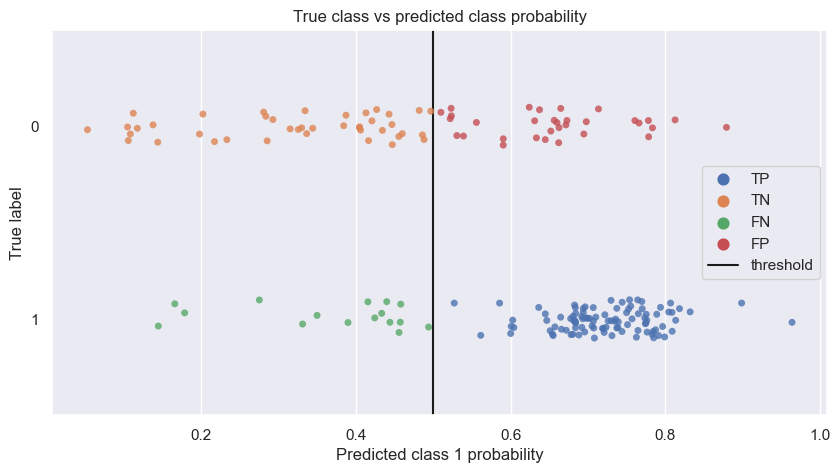

In [16]:
threshold = 0.5

prediction = np.repeat('TP', predicted_probs.size)
prediction[(predicted_probs < threshold) & (y_test == 0)] = 'TN'
prediction[(predicted_probs > threshold) & (y_test == 0)] = 'FP'
prediction[(predicted_probs < threshold) & (y_test == 1)] = 'FN'
df = pd.DataFrame(
    {'y_true': y_test,
     'predicted_probs': predicted_probs,
     'prediction': prediction
    })

plt.figure(figsize = (10,5))
sns.stripplot(
    data=df, x='predicted_probs', y='y_true', 
    alpha = 0.8, order = [0, 1], hue='prediction', orient = "h",
)
plt.axvline(threshold, c = "k", label = "threshold")
plt.xlabel("Predicted class 1 probability")
plt.ylabel("True label")
plt.title("True class vs predicted class probability")
plt.legend()
plt.show()

The blue points on the top correspond to healthy patients (R=0), and the orange points on the bototm correspond to cancer patients (R=1). For any point that falls to the left of the black line, we declare D=0.

Using this plot, where do we need to set the threshold to guarantee all the cancer patients (blue points) are classified correctly?

### ROC curves

Instead of trying one threshold at a time and seeing what we get, it would be nice if we could visualize the results from multiple thresholds all at once. This is what an ROC curve is for.

In [17]:
def get_tpr_fpr(reality, decision_probs, threshold):
    # Compute the denominators for the top and bottom rows (reality=0, reality=1)
    r1_count = reality.sum()
    r0_count = (1-reality).sum()
    decisions = (decision_probs >= threshold).astype(int)
    table = confusion_matrix(reality, decisions)
    tp_count = table[1,1]
    fp_count = table[0,1]
    tpr = tp_count / r1_count
    fpr = fp_count / r0_count
    
    return tpr, fpr

In [18]:
results = []
thresholds = np.arange(0, 1.01, 0.1)
for threshold in thresholds:
    TPR, FPR = get_tpr_fpr(y_test, predicted_probs, threshold)
    results.append((threshold, TPR, FPR))
results = pd.DataFrame(results, columns = ["threshold", "TPR", "FPR"])
results

,threshold,TPR,FPR
0,0.0,1.000000,1.000000
1,0.1,1.000000,0.986301
2,0.2,0.973913,0.876712
3,0.3,0.965217,0.780822
4,0.4,0.939130,0.671233
5,0.5,0.860870,0.438356
6,0.6,0.834783,0.315068
7,0.7,0.521739,0.109589
8,0.8,0.078261,0.027397
9,0.9,0.008696,0.000000


Text(0.5, 1.0, 'FPR vs TPR')

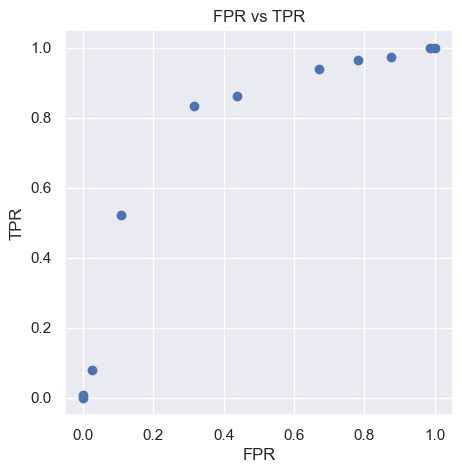

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(results["FPR"], results["TPR"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("FPR vs TPR")

Text(0.5, 1.0, 'FPR vs TPR')

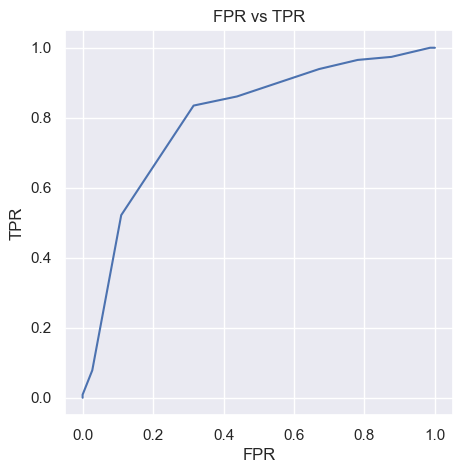

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(results["FPR"], results["TPR"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("FPR vs TPR")

#### ROC curves in scikit-learn

`scikit-learn` already does (almost) all this work for us, using the `roc_curve` function.

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
fpr, tpr, _ = roc_curve(y_test, predicted_probs)

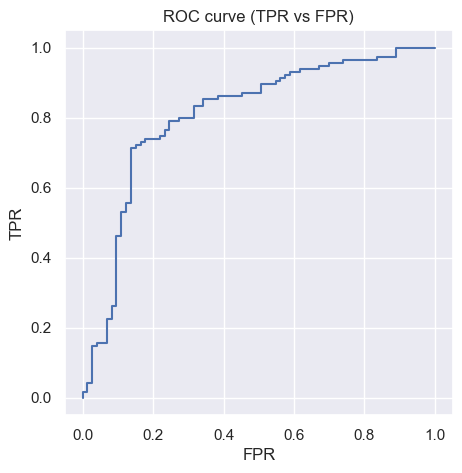

In [23]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve (TPR vs FPR)")
plt.show()

### Precision-recall curves

The ROC curve is useful if we want to compare the tradeoff between doing well when reality = 0 and doing well when reality = 1 (in other words, between performance in the top row and bottom of our table).

We can also look at the tradeoff between FDP (column-wise performance for the right column) and TPR (row-wise performance for the bottom row). The standard way that people do this is by plotting a precision-recall curve. The precision is defined to be 1 - FDP (in other words, when we make a discovery, how often is that discovery correct?).

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
precision, recall, _ = precision_recall_curve(y_test, predicted_probs)

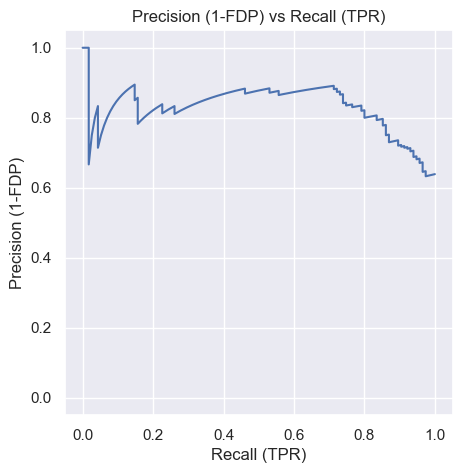

In [26]:
plt.figure(figsize = (5, 5))
plt.plot(recall, precision)
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision (1-FDP)")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("Precision (1-FDP) vs Recall (TPR)")
plt.show()